L'objectif est de détecter les piscines et les cars présents sur des images satellitaires. Pour ce faire, un [jeu de données](https://www.kaggle.com/datasets/tekbahadurkshetri/car-and-swimming-pool-satellite-imagery/data) fourni sur Kaggle a été utilisé. Les données sont images avec leurs annotations au format de YOLOv4.

## Installation de YOLOv8

## Import des modules

In [1]:
import os
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from skimage import io

## Téléchargement et extraction des données

In [2]:
import zipfile

In [3]:
# Téléchargement
!kaggle datasets download -d tekbahadurkshetri/car-and-swimming-pool-satellite-imagery

Dataset URL: https://www.kaggle.com/datasets/tekbahadurkshetri/car-and-swimming-pool-satellite-imagery
License(s): GPL-2.0
 94% 104M/110M [00:01<00:00, 64.6MB/s] 
100% 110M/110M [00:01<00:00, 60.4MB/s]


In [4]:
# Extraction des données -> dossier data
zipfile.ZipFile('car-and-swimming-pool-satellite-imagery.zip', 'r').extractall()

## Inspection des données

In [5]:
n_train_images = len(glob.glob("/content/data/train/*.jpg"))
n_train_labels = len(glob.glob("/content/data/train/*.txt"))
n_test_images = len(glob.glob("/content/data/test/*.jpg"))
n_test_labels = len(glob.glob("/content/data/test/*.txt"))
print(f"Nombre d'images d'entraînement : {n_train_images} - Nombre de labels : {n_train_labels}")
print(f"Nombre d'images de test : {n_test_images} - - Nombre de labels : {n_test_labels}")

Nombre d'images d'entraînement : 3748 - Nombre de labels : 3748
Nombre d'images de test : 2703 - - Nombre de labels : 0


In [6]:
train_images = sorted(glob.glob("/content/data/train/*.jpg"))
train_labels = sorted(glob.glob("/content/data/train/*.txt"))

print(f"Image : {train_images[0]} et label : {train_labels[0]}")

Image : /content/data/train/000000000.jpg et label : /content/data/train/000000000.txt


In [8]:
with open("/content/data/train/000000000.txt", "r") as f:
  print(f.read())

0 0.28136160714285713 0.7003125 0.04959821428571428 0.04964285714285716
0 0.06640625 0.9385714285714286 0.04959821428571428 0.04964285714285716
0 0.19941964285714286 0.00421875 0.04732142857142858 0.01736607142857143
0 0.22870535714285714 0.20466517857142855 0.04964285714285713 0.04959821428571428



Pour chaque ligne: `class x_center y_center width height`

In [17]:
def get_annotation(file):
  """
    Récupère les coordonnées des bounding box de l'image
  """
  if Path(file).exists():
    if Path(file).suffix == ".txt":
      with open(file, "r") as f:
        lines = f.readlines()
        height, width, _ = io.imread(file.replace(".txt", ".jpg")).shape
        annotations = []
        for line in lines:
          line = line.split(" ")
          x = float(line[1])
          y = float(line[2])
          w = float(line[3])
          h = float(line[4])
          classe = int(line[0])

          # x1, y1, x2, y2
          x1 = int((x - (w / 2)) * width)
          y1 = int((y - (h / 2)) * height)
          x2 = int((x + (w / 2)) * width)
          y2 = int((y + (h / 2)) * height)
          annotations.append([classe, x1, y1, x2, y2])
        return annotations

In [18]:
get_annotation(train_labels[0])

[[0, 57, 151, 68, 162],
 [0, 9, 204, 20, 215],
 [0, 39, -1, 49, 2],
 [0, 45, 40, 56, 51]]

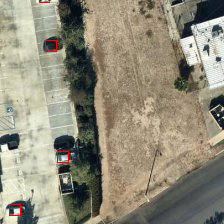

In [19]:
img = Image.open(train_images[0])
for annot in get_annotation(train_labels[0]):
 ImageDraw.Draw(img).rectangle(annot[1:], outline="red")
img

In [16]:
img.size

(224, 224)

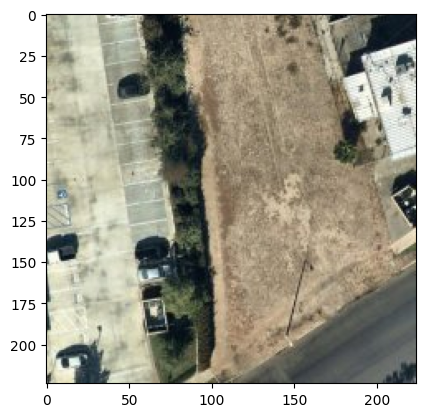

In [ ]:
plt.imshow(io.imread(train_images[0]))